<a href="https://colab.research.google.com/github/PetrovES570/PDA_SOL/blob/main/FbProphet_%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%95_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pystan==2.19.1.1

In [2]:
#!pip install prophet

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install prophet

In [7]:
#from fbprophet import Prophet

In [8]:

import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
#from fbprophet import Prophet

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

Сначала мы импортируем данные:

In [10]:

import pandas as pd
df = pd.read_csv('/content/SF_hospital_load.csv', parse_dates=['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8760 non-null   datetime64[ns]
 1   y       8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [11]:
df

,ds,y
0,2015-01-01 01:00:00,778.007969
1,2015-01-01 02:00:00,776.241750
2,2015-01-01 03:00:00,779.357338
3,2015-01-01 04:00:00,778.737196
4,2015-01-01 05:00:00,787.835835
...,...,...
8755,2015-12-31 20:00:00,845.563081
8756,2015-12-31 21:00:00,827.530521
8757,2015-12-31 22:00:00,829.256300
8758,2015-12-31 23:00:00,813.937205


In [12]:
df.groupby('ds').agg({'y': 'sum'}).reset_index()

,ds,y
0,2015-01-01 01:00:00,778.007969
1,2015-01-01 02:00:00,776.241750
2,2015-01-01 03:00:00,779.357338
3,2015-01-01 04:00:00,778.737196
4,2015-01-01 05:00:00,787.835835
...,...,...
8755,2015-12-31 20:00:00,845.563081
8756,2015-12-31 21:00:00,827.530521
8757,2015-12-31 22:00:00,829.256300
8758,2015-12-31 23:00:00,813.937205


In [13]:
df = df.groupby('ds').agg({'y': 'sum'}).reset_index()
df = df.sort_values(by=['ds'], ascending=[True])
df

,ds,y
0,2015-01-01 01:00:00,778.007969
1,2015-01-01 02:00:00,776.241750
2,2015-01-01 03:00:00,779.357338
3,2015-01-01 04:00:00,778.737196
4,2015-01-01 05:00:00,787.835835
...,...,...
8755,2015-12-31 20:00:00,845.563081
8756,2015-12-31 21:00:00,827.530521
8757,2015-12-31 22:00:00,829.256300
8758,2015-12-31 23:00:00,813.937205


In [14]:
df.describe()

,ds,y
count,8760,8760.000000
mean,2015-07-02 12:30:00,1012.454652
min,2015-01-01 01:00:00,715.644051
25%,2015-04-02 06:45:00,820.487963
50%,2015-07-02 12:30:00,931.869578
75%,2015-10-01 18:15:00,1242.089126
max,2016-01-01 00:00:00,1388.981796
std,NaN,198.329809


In [15]:
import plotly.express as px

In [16]:
px.line(df, x='ds', y='y')


In [17]:
#df = df.rename(columns={"date": "ds", "sale_dollars": "y"})
#df.info()

Мы обучаем модель, создавая экземпляр нового Prophet объекта. Любые настройки процедуры прогнозирования передаются в конструктор:

(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)

Но работает и "из коробки".

In [18]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw5pjqbm8/xrjyymcj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw5pjqbm8/w_3p9s2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89669', 'data', 'file=/tmp/tmpw5pjqbm8/xrjyymcj.json', 'init=/tmp/tmpw5pjqbm8/w_3p9s2m.json', 'output', 'file=/tmp/tmpw5pjqbm8/prophet_modely1gpq9kh/prophet_model-20240428150115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Затем прогнозы делаются на датафрейме со столбцом ds содержащим даты, для которых должен быть сделан прогноз. Вы можете получить подходящий датафрейм, который продлится в будущем на указанное количество дней, используя вспомогательный метод Prophet.make_future_dataframe.

In [19]:
# Python
future = m.make_future_dataframe(periods=30, freq='H')
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8790 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.8 KB


In [20]:
future.tail()

,ds
8785,2016-01-02 02:00:00
8786,2016-01-02 03:00:00
8787,2016-01-02 04:00:00
8788,2016-01-02 05:00:00
8789,2016-01-02 06:00:00


In [21]:

forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,1022.180872,534.071197,747.234448,1022.180872,1022.180872,-374.983680,-374.983680,-374.983680,-207.559110,-207.559110,-207.559110,-167.424569,-167.424569,-167.424569,0.0,0.0,0.0,647.197193
1,2015-01-01 02:00:00,1022.182213,529.567877,749.135510,1022.182213,1022.182213,-383.417116,-383.417116,-383.417116,-213.350116,-213.350116,-213.350116,-170.067000,-170.067000,-170.067000,0.0,0.0,0.0,638.765096
2,2015-01-01 03:00:00,1022.183553,530.188653,743.722624,1022.183553,1022.183553,-381.658420,-381.658420,-381.658420,-209.644759,-209.644759,-209.644759,-172.013662,-172.013662,-172.013662,0.0,0.0,0.0,640.525132
3,2015-01-01 04:00:00,1022.184893,547.400626,764.727025,1022.184893,1022.184893,-354.657696,-354.657696,-354.657696,-181.408925,-181.408925,-181.408925,-173.248771,-173.248771,-173.248771,0.0,0.0,0.0,667.527197
4,2015-01-01 05:00:00,1022.186233,627.407740,835.510769,1022.186233,1022.186233,-293.309884,-293.309884,-293.309884,-119.548097,-119.548097,-119.548097,-173.761787,-173.761787,-173.761787,0.0,0.0,0.0,728.876349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,2016-01-02 02:00:00,1035.473670,774.444677,985.761839,1035.473670,1035.473670,-149.907338,-149.907338,-149.907338,-213.350116,-213.350116,-213.350116,63.442777,63.442777,63.442777,0.0,0.0,0.0,885.566332
8786,2016-01-02 03:00:00,1035.488102,789.909559,1000.818959,1035.488102,1035.488102,-146.132344,-146.132344,-146.132344,-209.644759,-209.644759,-209.644759,63.512414,63.512414,63.512414,0.0,0.0,0.0,889.355758
8787,2016-01-02 04:00:00,1035.502534,806.379127,1019.461467,1035.502534,1035.502534,-118.061586,-118.061586,-118.061586,-181.408925,-181.408925,-181.408925,63.347338,63.347338,63.347338,0.0,0.0,0.0,917.440948
8788,2016-01-02 05:00:00,1035.516966,866.095618,1081.303806,1035.516966,1035.516966,-56.569660,-56.569660,-56.569660,-119.548097,-119.548097,-119.548097,62.978437,62.978437,62.978437,0.0,0.0,0.0,978.947306


In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8785,2016-01-02 02:00:00,885.566332,774.444677,985.761839
8786,2016-01-02 03:00:00,889.355758,789.909559,1000.818959
8787,2016-01-02 04:00:00,917.440948,806.379127,1019.461467
8788,2016-01-02 05:00:00,978.947306,866.095618,1081.303806
8789,2016-01-02 06:00:00,1068.281687,962.590001,1179.401948


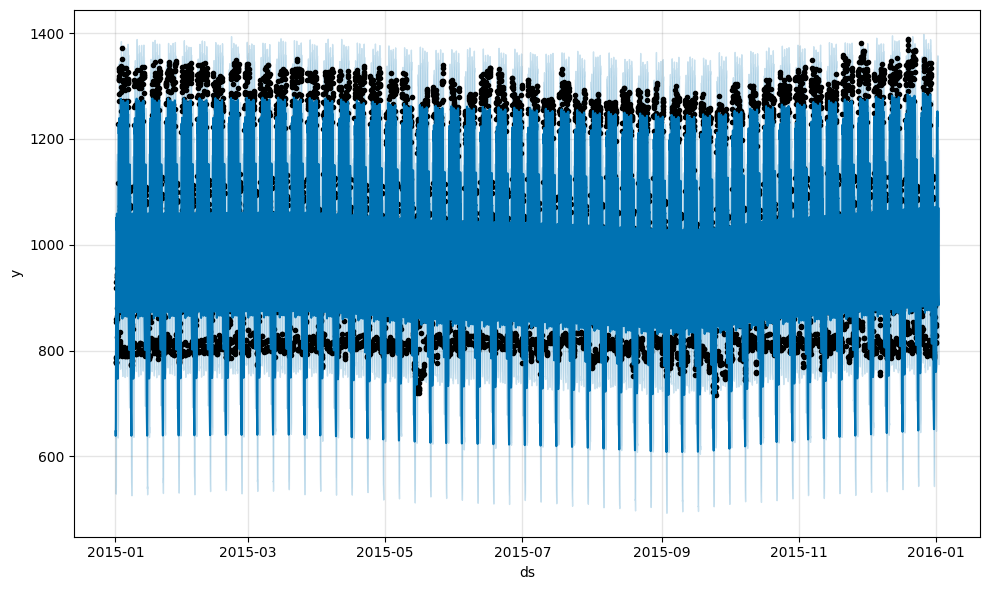

In [23]:

fig1 = m.plot(forecast)

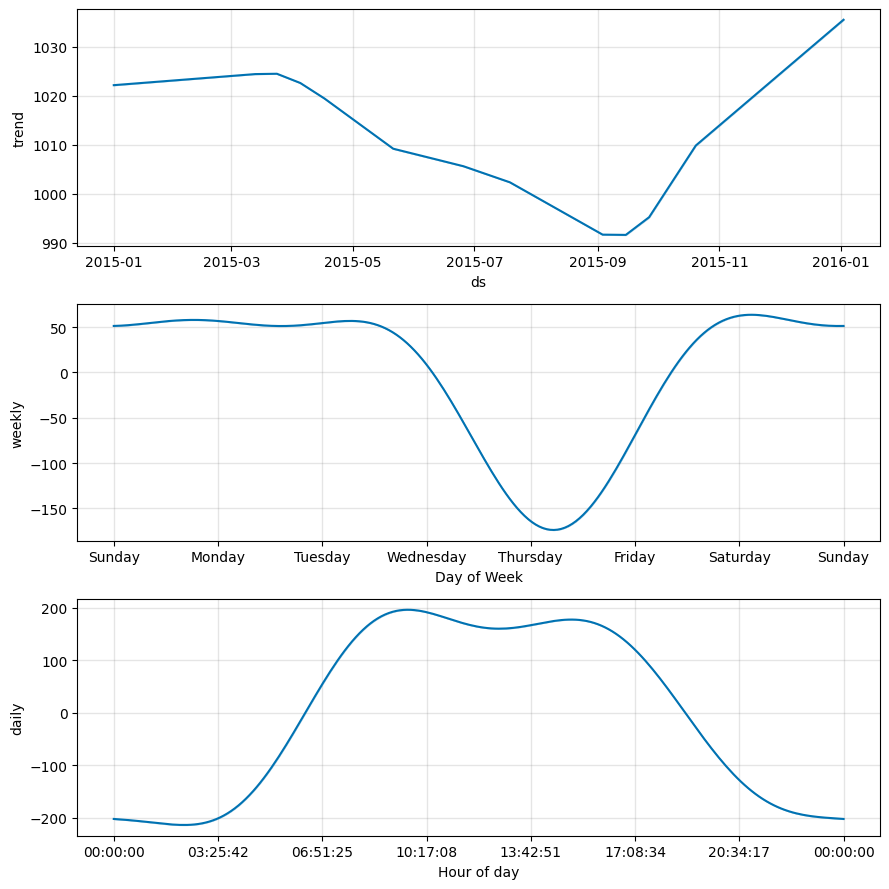

In [24]:
# Python
fig2 = m.plot_components(forecast)

Интерактивный график прогноза и его компонентов может быть создан с помощью plotly. Вам нужно будет установить plotly 4.0 или выше отдельно, так как по умолчанию он не будет устанавливаться вместе с prophet.

In [25]:

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [26]:
plot_components_plotly(m, forecast)

Более подробная информация о параметрах, доступных для каждого метода, доступна в документации, например, через help(Prophet) или help(Prophet.fit).

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,1022.180872,534.071197,747.234448,1022.180872,1022.180872,-374.983680,-374.983680,-374.983680,-207.559110,-207.559110,-207.559110,-167.424569,-167.424569,-167.424569,0.0,0.0,0.0,647.197193
1,2015-01-01 02:00:00,1022.182213,529.567877,749.135510,1022.182213,1022.182213,-383.417116,-383.417116,-383.417116,-213.350116,-213.350116,-213.350116,-170.067000,-170.067000,-170.067000,0.0,0.0,0.0,638.765096
2,2015-01-01 03:00:00,1022.183553,530.188653,743.722624,1022.183553,1022.183553,-381.658420,-381.658420,-381.658420,-209.644759,-209.644759,-209.644759,-172.013662,-172.013662,-172.013662,0.0,0.0,0.0,640.525132
3,2015-01-01 04:00:00,1022.184893,547.400626,764.727025,1022.184893,1022.184893,-354.657696,-354.657696,-354.657696,-181.408925,-181.408925,-181.408925,-173.248771,-173.248771,-173.248771,0.0,0.0,0.0,667.527197
4,2015-01-01 05:00:00,1022.186233,627.407740,835.510769,1022.186233,1022.186233,-293.309884,-293.309884,-293.309884,-119.548097,-119.548097,-119.548097,-173.761787,-173.761787,-173.761787,0.0,0.0,0.0,728.876349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,2016-01-02 02:00:00,1035.473670,774.444677,985.761839,1035.473670,1035.473670,-149.907338,-149.907338,-149.907338,-213.350116,-213.350116,-213.350116,63.442777,63.442777,63.442777,0.0,0.0,0.0,885.566332
8786,2016-01-02 03:00:00,1035.488102,789.909559,1000.818959,1035.488102,1035.488102,-146.132344,-146.132344,-146.132344,-209.644759,-209.644759,-209.644759,63.512414,63.512414,63.512414,0.0,0.0,0.0,889.355758
8787,2016-01-02 04:00:00,1035.502534,806.379127,1019.461467,1035.502534,1035.502534,-118.061586,-118.061586,-118.061586,-181.408925,-181.408925,-181.408925,63.347338,63.347338,63.347338,0.0,0.0,0.0,917.440948
8788,2016-01-02 05:00:00,1035.516966,866.095618,1081.303806,1035.516966,1035.516966,-56.569660,-56.569660,-56.569660,-119.548097,-119.548097,-119.548097,62.978437,62.978437,62.978437,0.0,0.0,0.0,978.947306


# **fbprophet**

In [28]:
train_data = df.sample(frac=0.8, random_state=10)

In [29]:
validation_data = df.drop(train_data.index)

print(f'training data size : {train_data.shape}')
print(f'validation data size : {validation_data.shape}')

train_data = train_data.reset_index()
validation_data = validation_data.reset_index()

training data size : (7008, 2)
validation data size : (1752, 2)


In [30]:
model = Prophet()#yearly_seasonality=True) #сначала по умолчанию (без yearly_seasonality=True), затем используя настройки Пророка
model.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw5pjqbm8/0bhosgzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw5pjqbm8/ol4w840r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18957', 'data', 'file=/tmp/tmpw5pjqbm8/0bhosgzx.json', 'init=/tmp/tmpw5pjqbm8/ol4w840r.json', 'output', 'file=/tmp/tmpw5pjqbm8/prophet_modelsvc56iud/prophet_model-20240428150201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
prediction = model.predict(pd.DataFrame({'ds':validation_data['ds']}))
y_actual = validation_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mean_absolute_error(y_actual, y_predicted)

67.49961394994291

In [32]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=validation_data['ds'], y=y_actual, name="actual"),
    secondary_y=False,)
fig.add_trace(
    go.Scatter(x=validation_data['ds'], y=y_predicted, name="predicted"),
    secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual", secondary_y=False)
fig.update_yaxes(title_text="predicted", secondary_y=True)
fig.show()

**Прогнозирование**

In [33]:
'''
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NeuralProphet/Data/test_6QvDdzb.csv')
print(f'test dataset size : {test_data.shape}')
testing_data = dataPreprocessing(test_data.copy())
testing_data.head()
'''

"\ntest_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NeuralProphet/Data/test_6QvDdzb.csv')\nprint(f'test dataset size : {test_data.shape}')\ntesting_data = dataPreprocessing(test_data.copy())\ntesting_data.head()\n"

In [34]:
#test_prediction = model.predict(pd.DataFrame({'ds':testing_data['date']}))

In [35]:
'''
test_prediction = test_prediction['yhat']
test_prediction = test_prediction.astype(int)
test_data['demand'] = test_prediction
test_data.head()
test_data.to_csv('submission.csv', index=False)
'''

"\ntest_prediction = test_prediction['yhat']\ntest_prediction = test_prediction.astype(int)\ntest_data['demand'] = test_prediction\ntest_data.head()\ntest_data.to_csv('submission.csv', index=False)\n"

In [36]:
#pip install plotly

In [38]:
'''
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes


# set_log_level("ERROR")
'''

'\nif \'google.colab\' in str(get_ipython()):\n    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while\n    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes\n\n\n# set_log_level("ERROR")\n'

In [39]:
#import pandas as pd
#from neuralprophet import NeuralProphet, set_log_level

In [ ]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
59,55.974636,80.879631,0.02857,0.0,59,45.351204,64.000397,0.013723,0.0


In [ ]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.988% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.988% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency H


Predicting: 126it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-30*7:])

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.863% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency H corresponds to 99.863% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency H


Predicting: 126it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
